# Comparison of blackbox optimization techniques

In [7]:
import statistics
from collections import OrderedDict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
)

## View the avarage runtime growths

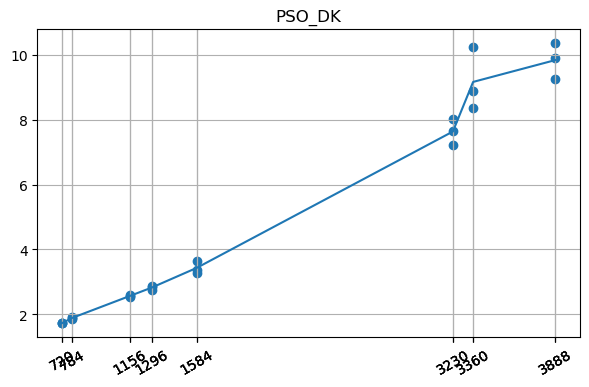

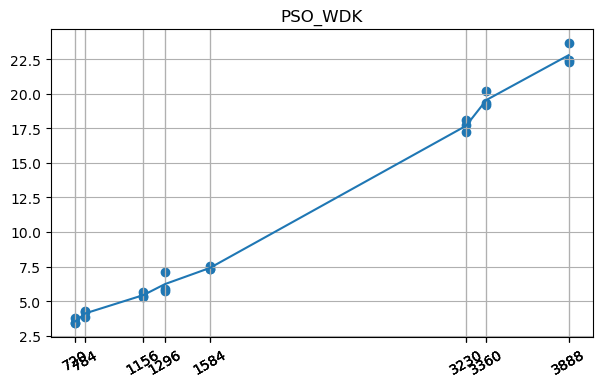

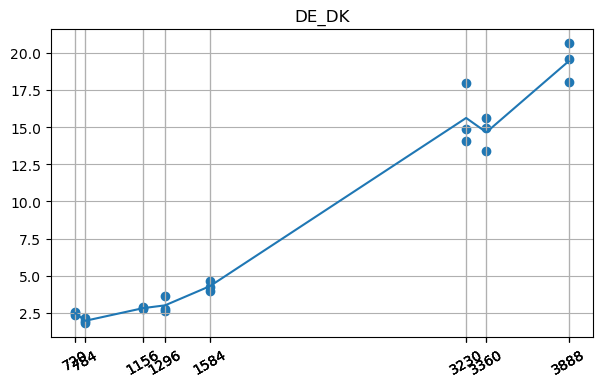

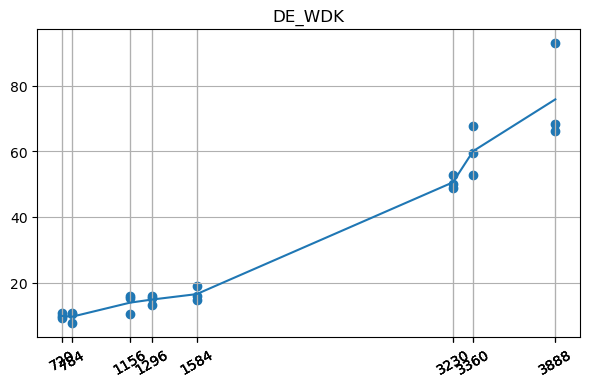

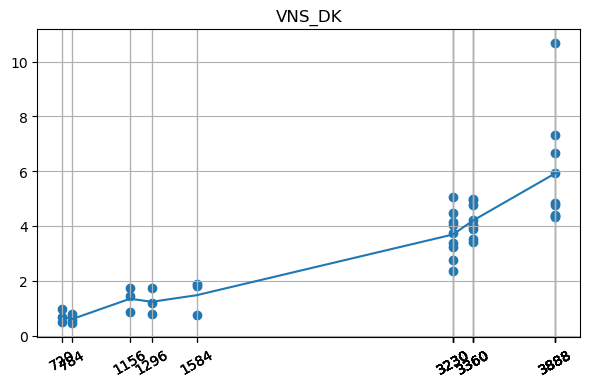

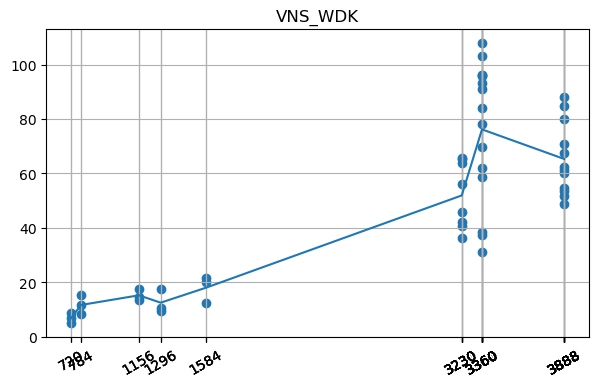

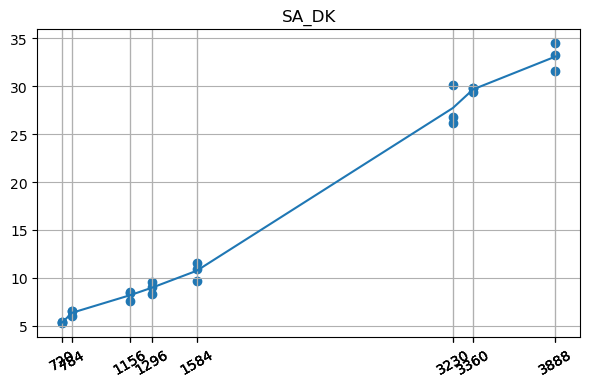

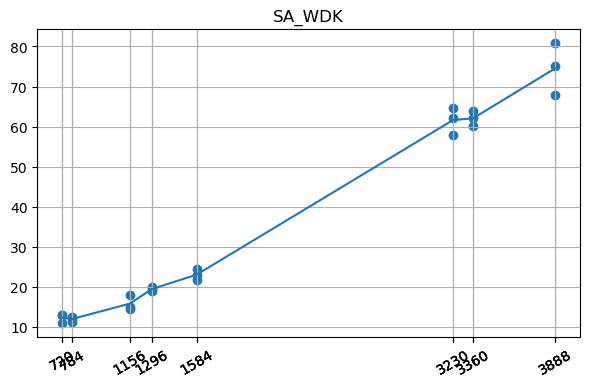

In [8]:
PSO_DK_df = pd.read_csv('CSVs/blackbox_optimization/PAPSO/PSO_DK.csv')
PSO_WDK_df = pd.read_csv('CSVs/blackbox_optimization/PAPSO/PSO_WDK.csv')

DE_DK_df = pd.read_csv('CSVs/blackbox_optimization/DE/DE_DK.csv')
DE_WDK_df = pd.read_csv('CSVs/blackbox_optimization/DE/DE_WDK.csv')

VNS_DK_df = pd.read_csv('CSVs/blackbox_optimization/VNS/VNS_DK.csv')
VNS_WDK_df = pd.read_csv('CSVs/blackbox_optimization/VNS/VNS_WDK.csv')

SA_DK_df = pd.read_csv('CSVs/blackbox_optimization/SA/SA_DK.csv')
SA_WDK_df = pd.read_csv('CSVs/blackbox_optimization/SA/SA_WDK.csv')


def average_line(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby('total_sat', as_index=False)['time_h'].mean()


for df, name in [
    (PSO_DK_df, 'PSO_DK'),
    (PSO_WDK_df, 'PSO_WDK'),
    (DE_DK_df, 'DE_DK'),
    (DE_WDK_df, 'DE_WDK'),
    (VNS_DK_df, 'VNS_DK'),
    (VNS_WDK_df, 'VNS_WDK'),
    (SA_DK_df, 'SA_DK'),
    (SA_WDK_df, 'SA_WDK'),
]:
    df['time_h'] = df['time_s'] / 3600

    df_average_line = average_line(df)
    plt.plot(df_average_line['total_sat'], df_average_line['time_h'])

    plt.scatter(df['total_sat'], df['time_h'])
    plt.xticks(df['total_sat'], rotation=30)
    plt.title(name)
    plt.grid()
    plt.show()

## Comparing the runtime of different techniques

### Showing the variation over multiple trials

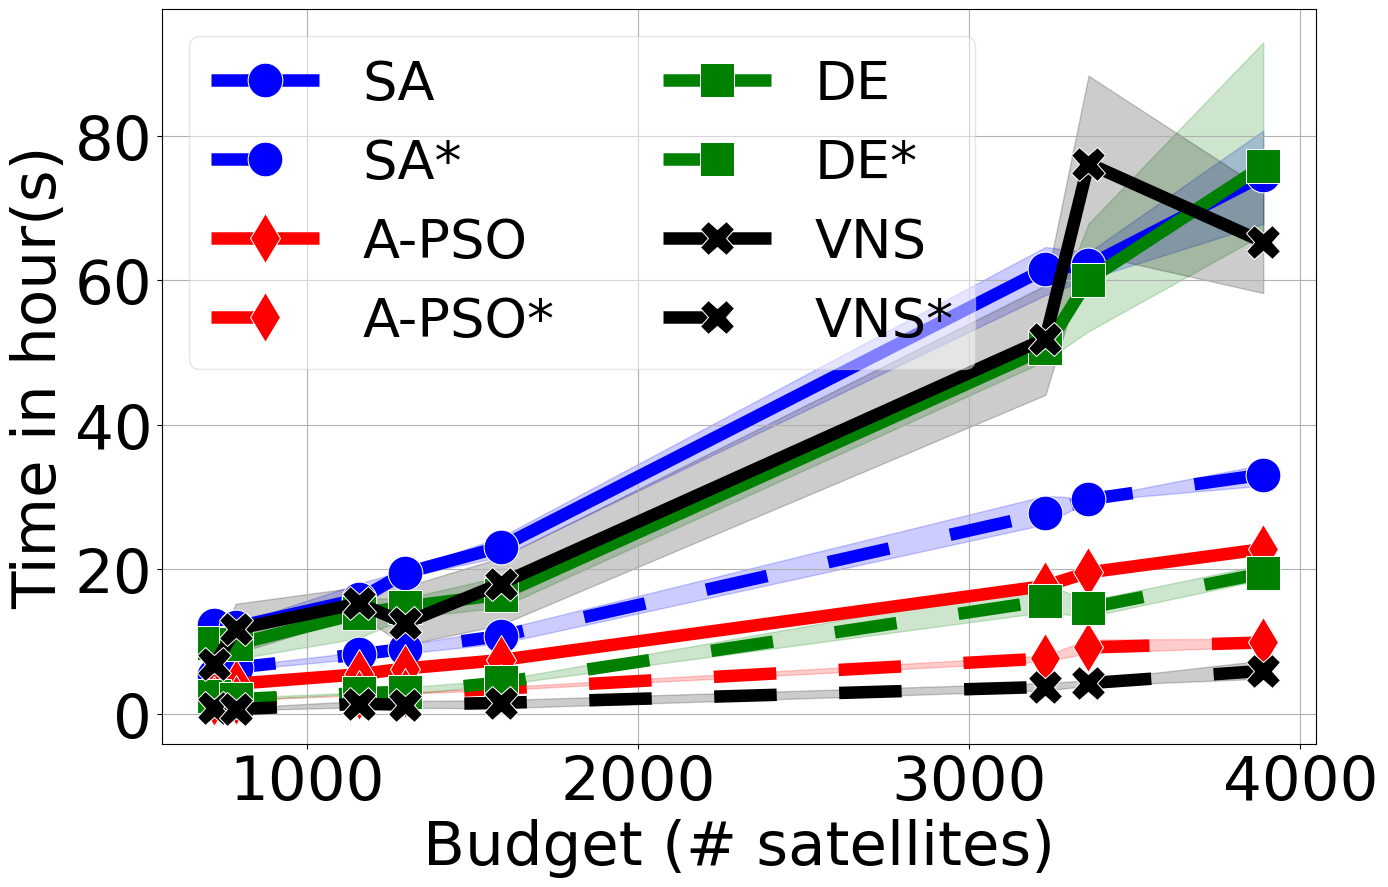

In [9]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams.update({'font.size': 44})

sns.lineplot(data=SA_WDK_df, x='total_sat', y='time_h', label='SA',
             linewidth=9, color='b',  linestyle=linestyles['solid'], marker='o', ms=25)
sns.lineplot(data=SA_DK_df, x='total_sat', y='time_h', label='SA*',
             linewidth=9, color='b',  linestyle=linestyles['dashed'], marker='o', ms=25)


sns.lineplot(data=PSO_WDK_df, x='total_sat', y='time_h', label='A-PSO',
             linewidth=9, color='r', linestyle=linestyles['solid'], marker='d', ms=25)
sns.lineplot(data=PSO_DK_df, x='total_sat', y='time_h', label='A-PSO*',
             linewidth=9, color='r', linestyle=linestyles['dashed'], marker='d', ms=25)


sns.lineplot(data=DE_WDK_df, x='total_sat', y='time_h', label='DE',
             linewidth=9, color='g',  linestyle=linestyles['solid'], marker='s', ms=25)
sns.lineplot(data=DE_DK_df, x='total_sat', y='time_h',   label='DE*',
             linewidth=9, color='g',  linestyle=linestyles['dashed'],  marker='s', ms=25)

sns.lineplot(data=VNS_WDK_df, x='total_sat', y='time_h', label='VNS',
             linewidth=9, color='black', linestyle=linestyles['solid'], marker='X', ms=25)
sns.lineplot(data=VNS_DK_df, x='total_sat', y='time_h', label='VNS*', linewidth=9,
             color='black', linestyle=linestyles['dashed'], marker='X', ms=25)


plt.xlabel('Budget (# satellites)')
plt.ylabel('Time in hour(s)')
# plt.yscale("log")
# plt.legend(ncol=1, framealpha=0.5,loc=2)
plt.legend(ncol=2, framealpha=0.5, loc=2, prop={'size': 39})
plt.grid()
plt.tight_layout()
# plt.savefig('figures/compare/running_time.png')
plt.show()

### Showing the avarage over multiple trials

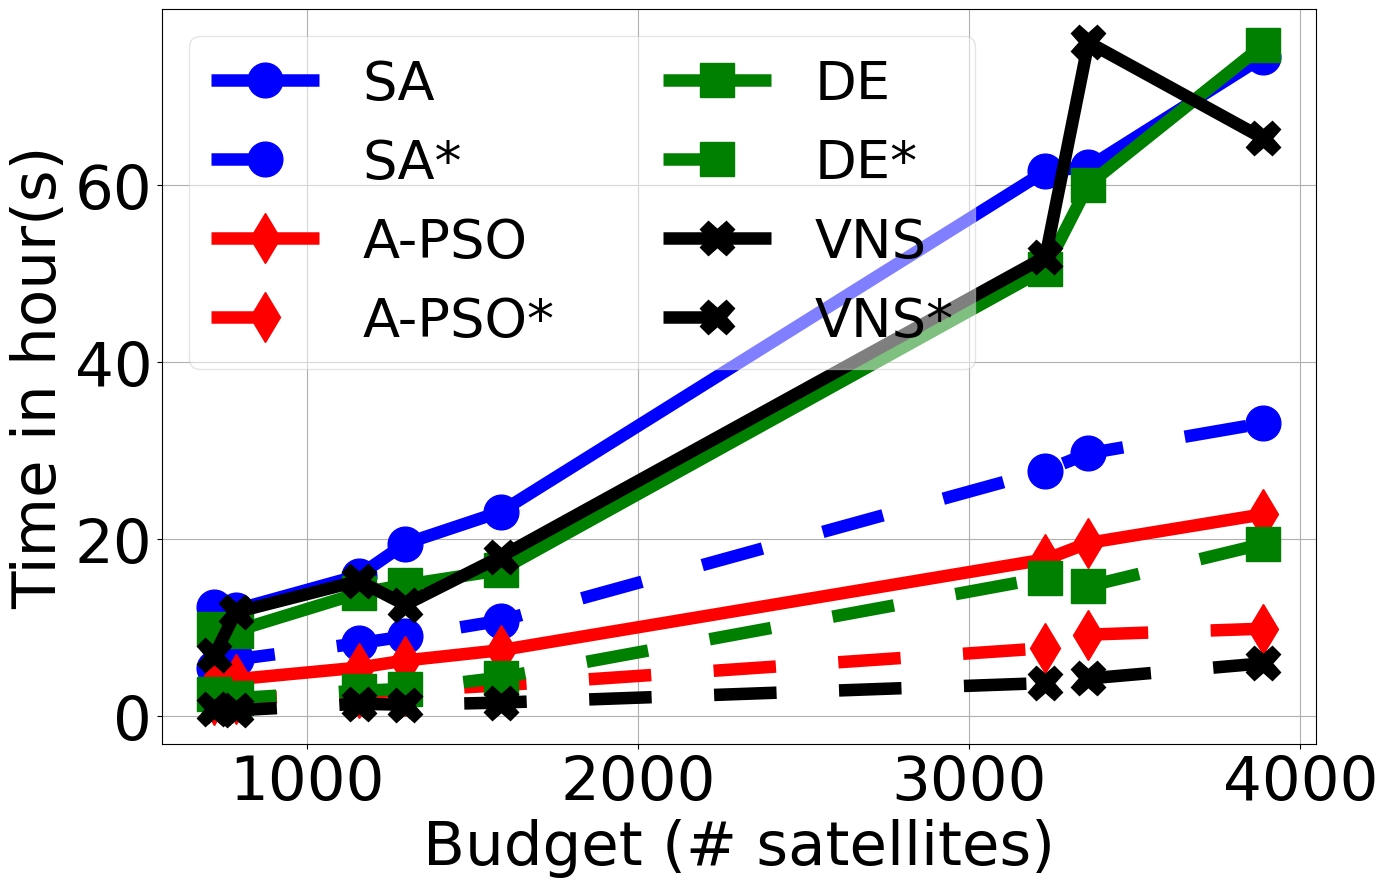

In [11]:
def prepare_optimization(filename) -> pd.DataFrame:
    df = pd.read_csv(filename)
    df['time_s'] /= 3600
    df['gbps'] /= 1000
    return df.groupby('total_sat', as_index=False).mean()


def prepare_performance(filename) -> pd.DataFrame:
    df = pd.read_csv(filename)
    df['total_sat'] = df['S0_o']*df['S0_n']
    df = df.sort_values(by='total_sat')
    return df.groupby('total_sat', as_index=False).mean()


PSO_DK_df = prepare_optimization('CSVs/blackbox_optimization/PAPSO/PSO_DK.csv')
PSO_WDK_df = prepare_optimization(
    'CSVs/blackbox_optimization/PAPSO/PSO_WDK.csv')

DE_DK_df = prepare_optimization('CSVs/blackbox_optimization/DE/DE_DK.csv')
DE_WDK_df = prepare_optimization('CSVs/blackbox_optimization/DE/DE_WDK.csv')

VNS_DK_df = prepare_optimization('CSVs/blackbox_optimization/VNS/VNS_DK.csv')
VNS_WDK_df = prepare_optimization('CSVs/blackbox_optimization/VNS/VNS_WDK.csv')

SA_DK_df = prepare_optimization('CSVs/blackbox_optimization/SA/SA_DK.csv')
SA_WDK_df = prepare_optimization('CSVs/blackbox_optimization/SA/SA_WDK.csv')


plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams.update({'font.size': 44})


plt.plot(SA_WDK_df['total_sat'], SA_WDK_df['time_s'], label='SA',
         linewidth=9, color='b',  linestyle=linestyles['solid'], marker='o', ms=25)
plt.plot(SA_DK_df['total_sat'], SA_DK_df['time_s'], label='SA*',  linewidth=9,
         color='b',  linestyle=linestyles['dashed'], marker='o', ms=25)


plt.plot(PSO_WDK_df['total_sat'], PSO_WDK_df['time_s'], label='A-PSO',
         linewidth=9, color='r', linestyle=linestyles['solid'], marker='d', ms=25)
plt.plot(PSO_DK_df['total_sat'], PSO_DK_df['time_s'], label='A-PSO*',
         linewidth=9, color='r', linestyle=linestyles['dashed'], marker='d', ms=25)


plt.plot(DE_WDK_df['total_sat'], DE_WDK_df['time_s'], label='DE',
         linewidth=9, color='g',  linestyle=linestyles['solid'], marker='s', ms=25)
plt.plot(DE_DK_df['total_sat'], DE_DK_df['time_s'],   label='DE*',
         linewidth=9, color='g',  linestyle=linestyles['dashed'],  marker='s', ms=25)


plt.plot(VNS_WDK_df['total_sat'], VNS_WDK_df['time_s'], label='VNS',
         linewidth=9, color='black', linestyle=linestyles['solid'], marker='X', ms=25)
plt.plot(VNS_DK_df['total_sat'], VNS_DK_df['time_s'], label='VNS*', linewidth=9,
         color='black', linestyle=linestyles['dashed'], marker='X', ms=25)


plt.xlabel('Budget (# satellites)')
plt.ylabel('Time in hour(s)')
# plt.yscale("log")
# plt.legend(ncol=1, framealpha=0.5,loc=2)
plt.legend(ncol=2, framealpha=0.5, loc=2, prop={'size': 39})
plt.grid()
plt.tight_layout()
# plt.savefig('figures/compare/running_time.png')
plt.show()

## Comparing performance metrics of optimized designs

### Throughput

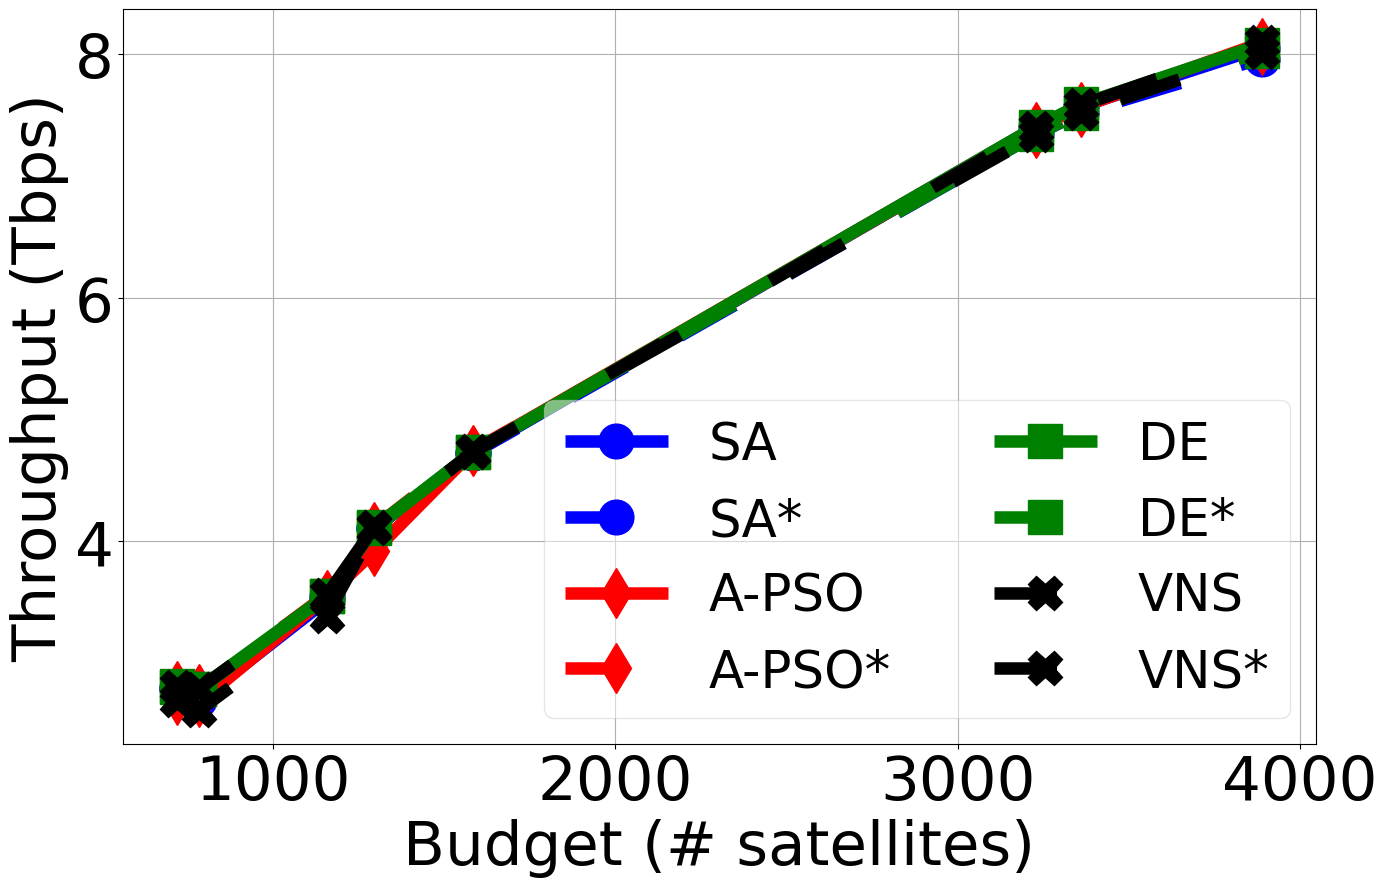

In [12]:
plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(SA_WDK_df['total_sat'], SA_WDK_df['gbps'], label='SA',
         linewidth=9, color='b', linestyle=linestyles['solid'], marker='o', ms=25)
plt.plot(SA_DK_df['total_sat'], SA_DK_df['gbps'], label='SA*',  linewidth=9,
         color='b', linestyle=linestyles['dashed'], marker='o', ms=25)

plt.plot(PSO_WDK_df['total_sat'], PSO_WDK_df['gbps'], label='A-PSO',
         linewidth=9, color='r', linestyle=linestyles['solid'], marker='d', ms=25)
plt.plot(PSO_DK_df['total_sat'], PSO_DK_df['gbps'], label='A-PSO*',
         linewidth=9, color='r', linestyle=linestyles['dashed'], marker='d', ms=25)


plt.plot(DE_WDK_df['total_sat'], DE_WDK_df['gbps'], label='DE', linewidth=9,
         color='g',  linestyle=linestyles['solid'], marker='s', ms=25)
plt.plot(DE_DK_df['total_sat'], DE_DK_df['gbps'], label='DE*',  linewidth=9,
         color='g',  linestyle=linestyles['dashed'],  marker='s', ms=25)


plt.plot(VNS_WDK_df['total_sat'], VNS_WDK_df['gbps'], label='VNS', linewidth=9,
         color='black', linestyle=linestyles['loosely dashed'], marker='X', ms=25)
plt.plot(VNS_DK_df['total_sat'], VNS_DK_df['gbps'], label='VNS*', linewidth=9,
         color='black', linestyle=linestyles['loosely dashed'], marker='X', ms=25)


plt.xlabel('Budget (# satellites)')
plt.ylabel('Throughput (Tbps)')
plt.grid()
plt.legend(ncol=2, framealpha=0.5, loc=4, prop={'size': 37})
plt.tight_layout()
plt.show()

### Median of NS stretch

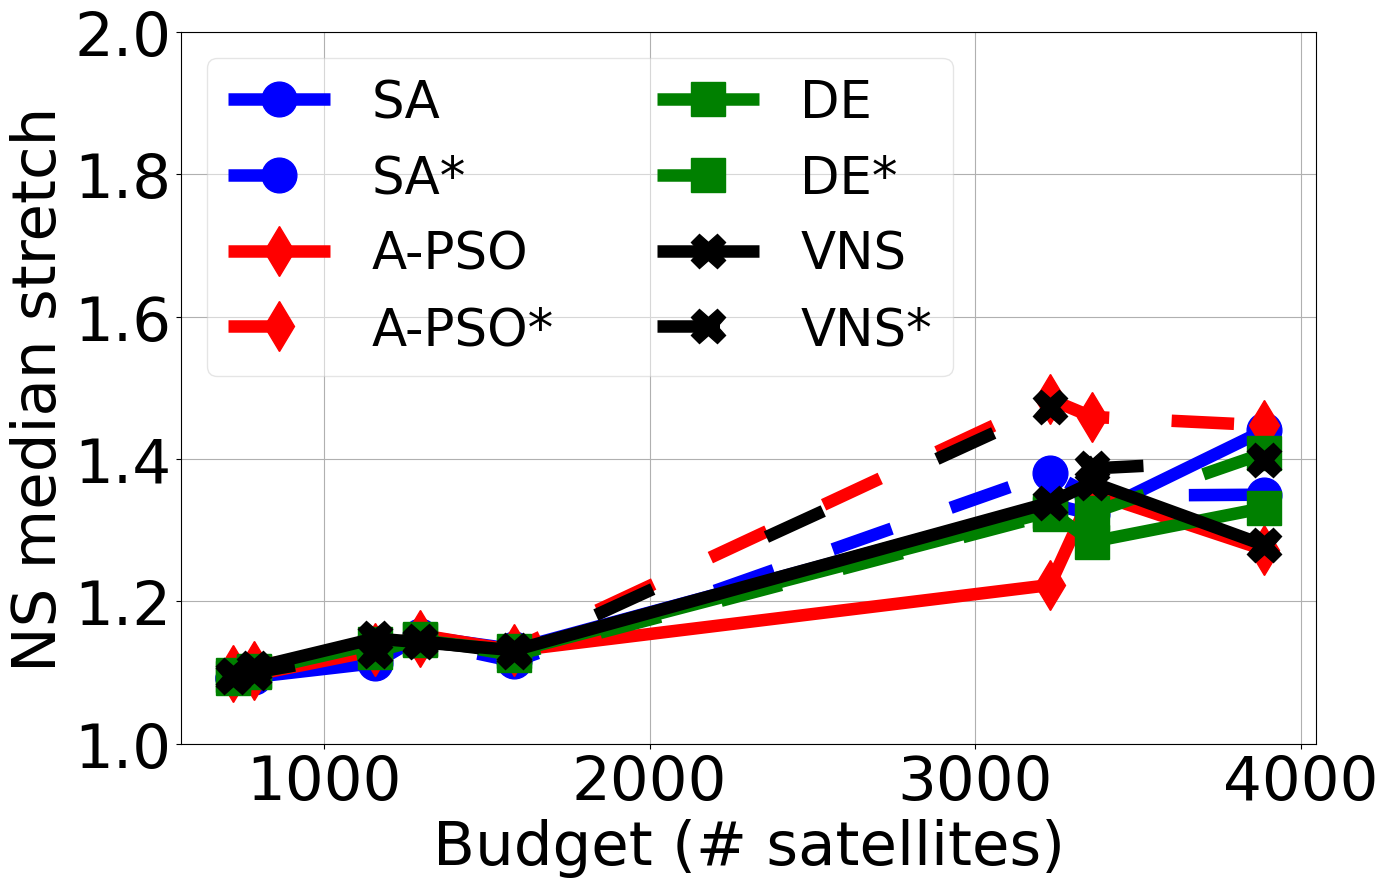

In [13]:
PSO_DK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/APSO/PSO_DK_PERF.csv')
PSO_WDK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/APSO/PSO_WDK_PERF.csv')

DE_DK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/DE/DE_DK_PERF.csv')
DE_WDK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/DE/DE_WDK_PERF.csv')

VNS_DK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/VNS/VNS_DK_PERF.csv')
VNS_WDK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/VNS/VNS_WDK_PERF.csv')

SA_DK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/SA/SA_DK_PERF.csv')
SA_WDK_PERF_df = prepare_performance(
    'CSVs/blackbox_optimization/SA/SA_WDK_PERF.csv')

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(SA_WDK_PERF_df['total_sat'], SA_WDK_PERF_df['NS_sth'], label='SA',
         linewidth=9, color='b', linestyle=linestyles['solid'], marker='o', ms=25)
plt.plot(SA_DK_PERF_df['total_sat'], SA_DK_PERF_df['NS_sth'], label='SA*',
         linewidth=9, color='b', linestyle=linestyles['dashed'], marker='o', ms=25)


plt.plot(PSO_WDK_PERF_df['total_sat'], PSO_WDK_PERF_df['NS_sth'], label='A-PSO',
         linewidth=9, color='r', linestyle=linestyles['solid'], marker='d', ms=25)
plt.plot(PSO_DK_PERF_df['total_sat'], PSO_DK_PERF_df['NS_sth'], label='A-PSO*',
         linewidth=9, color='r', linestyle=linestyles['dashed'], marker='d', ms=25)


plt.plot(DE_WDK_PERF_df['total_sat'], DE_WDK_PERF_df['NS_sth'], label='DE',
         linewidth=9, color='g',  linestyle=linestyles['solid'], marker='s', ms=25)
plt.plot(DE_DK_PERF_df['total_sat'], DE_DK_PERF_df['NS_sth'], label='DE*',
         linewidth=9, color='g',  linestyle=linestyles['dashed'],  marker='s', ms=25)


plt.plot(VNS_WDK_PERF_df['total_sat'], VNS_WDK_PERF_df['NS_sth'], label='VNS',
         linewidth=9, color='black', linestyle=linestyles['solid'], marker='X', ms=25)
plt.plot(VNS_DK_PERF_df['total_sat'], VNS_DK_PERF_df['NS_sth'], label='VNS*',
         linewidth=9, color='black', linestyle=linestyles['loosely dashed'], marker='X', ms=25)


plt.xlabel('Budget (# satellites)')
plt.ylabel('NS median stretch')
plt.ylim(1, 2)
plt.grid()
plt.legend(ncol=2, framealpha=0.5, loc=2, prop={'size': 37})
plt.tight_layout()
plt.show()

## Quantify runtime difference of different optimization techniques

### Speed up with heuristics

Runtime reduction using domain knowledge (DK) compared to without domain knowledge (WDK)

In [18]:
for with_df, without_dk, name in [
    (SA_DK_df, SA_WDK_df, 'SA'),
    (DE_DK_df, DE_WDK_df, 'DE'),
    (PSO_DK_df, PSO_WDK_df, 'PSO'),
    (VNS_DK_df, VNS_WDK_df, 'VNS')
]:

    timex = []
    for total_sat in with_df['total_sat'].unique():
        v1 = with_df[with_df['total_sat'] == total_sat]['time_s']
        v2 = without_dk[without_dk['total_sat'] == total_sat]['time_s']
        if not v1.empty and not v2.empty:
            timex.append(v2.item()/v1.item())

    print('__________________________________')
    print(f'_______________{name}_________________')
    print(f'MAX reduction:    {round(max(timex), 1)}x times')
    print(f'MIN reduction:    {round(min(timex), 1)}x times')
    print(f'MEDIAN reduction: {round(statistics.median(timex), 1)}x times')
    print(f'MEAN reduction:   {round(statistics.mean(timex), 1)}x times')

__________________________________
_______________SA_________________
MAX reduction:    2.3x times
MIN reduction:    1.9x times
MEDIAN reduction: 2.2x times
MEAN reduction:   2.1x times
__________________________________
_______________DE_________________
MAX reduction:    4.9x times
MIN reduction:    3.2x times
MEDIAN reduction: 4.0x times
MEAN reduction:   4.2x times
__________________________________
_______________PSO_________________
MAX reduction:    2.3x times
MIN reduction:    2.1x times
MEDIAN reduction: 2.2x times
MEAN reduction:   2.2x times
__________________________________
_______________VNS_________________
MAX reduction:    19.5x times
MIN reduction:    9.7x times
MEDIAN reduction: 11.8x times
MEAN reduction:   13.3x times


### Speed up compared to best technique, i.e., VNS

How much faster is the VNS with domain knowlege than other techniques without DK

In [ ]:
for with_df, without_dk, name in [
    (VNS_DK_df, SA_WDK_df, 'SA'),
    (VNS_DK_df, DE_WDK_df, 'DE'),
    (VNS_DK_df, PSO_WDK_df, 'PSO'),
    (VNS_DK_df, VNS_WDK_df, 'VNS')
]:

    timex = []
    for total_sat in with_df['total_sat'].unique():
        v1 = with_df[with_df['total_sat'] == total_sat]['time_s']
        v2 = without_dk[without_dk['total_sat'] == total_sat]['time_s']
        if not v1.empty and not v2.empty:
            timex.append(v2.item()/v1.item())

    print('_________________________________________')
    print(f'_______________{name}/VNS_DK_________________')
    print(f'MAX:    {round(max(timex), 1)}x faster')
    print(f'MIN:    {round(min(timex), 1)}x faster')
    print(f'MEDIAN: {round(statistics.median(timex), 1)}x faster')
    print(f'MEAN:   {round(statistics.mean(timex), 1)}x faster')

_________________________________________
_______________SA/VNS_DK_________________
MAX:    20.0x faster
MIN:    11.8x faster
MEDIAN: 15.7x faster
MEAN:   15.6x faster
_________________________________________
_______________DE/VNS_DK_________________
MAX:    16.0x faster
MIN:    10.3x faster
MEDIAN: 13.3x faster
MEAN:   13.0x faster
_________________________________________
_______________PSO/VNS_DK_________________
MAX:    6.9x faster
MIN:    3.8x faster
MEDIAN: 4.9x faster
MEAN:   4.9x faster
_________________________________________
_______________VNS/VNS_DK_________________
MAX:    19.5x faster
MIN:    9.7x faster
MEDIAN: 11.8x faster
MEAN:   13.3x faster


How much faster is the VNS with domain knowlege than other techniques with domain knowlege

In [27]:
for with_df, without_dk, name in [
    (VNS_DK_df, SA_DK_df, 'SA'),
    (VNS_DK_df, DE_DK_df, 'DE'),
    (VNS_DK_df, PSO_DK_df, 'PSO'),
    (VNS_DK_df, VNS_DK_df, 'VNS')
]:

    timex = []
    for total_sat in with_df['total_sat'].unique():
        v1 = with_df[with_df['total_sat'] == total_sat]['time_s']
        v2 = without_dk[without_dk['total_sat'] == total_sat]['time_s']
        if not v1.empty and not v2.empty:
            timex.append(v2.item()/v1.item())

    print('__________________________________')
    print(f'_______________{name}_________________')
    print(f'MAX:    {round(max(timex),1)}x times faster')
    print(f'MIN:    {round(min(timex),1)}x times faster')
    print(f'MEDIAN: {round(statistics.median(timex),1)}x times faster')
    print(f'MEAN:   {round(statistics.mean(timex),1)}x times faster')

__________________________________
_______________SA_________________
MAX:    10.6x times faster
MIN:    5.6x times faster
MEDIAN: 7.3x times faster
MEAN:   7.4x times faster
__________________________________
_______________DE_________________
MAX:    4.2x times faster
MIN:    2.1x times faster
MEDIAN: 3.3x times faster
MEAN:   3.2x times faster
__________________________________
_______________PSO_________________
MAX:    3.1x times faster
MIN:    1.7x times faster
MEDIAN: 2.2x times faster
MEAN:   2.3x times faster
__________________________________
_______________VNS_________________
MAX:    1.0x times faster
MIN:    1.0x times faster
MEDIAN: 1.0x times faster
MEAN:   1.0x times faster
